In [1]:
import deepl

auth_key = "7f03f88a-3bd9-4fd4-bbd1-c95a5574f3bd:fx"  # Replace with your key
translator = deepl.Translator(auth_key)

result = translator.translate_text("Hello, world!", target_lang="FR")
print(result.text)

result = translator.translate_text("Hallo Welt!", target_lang="FR")
print(result.text)

Bonjour à tous !
Bonjour le monde !


In [ ]:
import nltk
from nltk.corpus import stopwords
# Télécharger les stopwords français
nltk.download('stopwords')
# Charger la liste des stopwords en français
nltk_stopwords = set(stopwords.words('french'))
# Ajouter vos propres mots à exclure si nécessaire
custom_stopwords = {"le", "la", "pour", "des", "du", "une", "les", "sur", "un", "de"}
all_stopwords = nltk_stopwords.union(custom_stopwords)
# Filtrer les mots de plus de trois lettres et exclure tous les stopwords
filtered_word_counts = word_counts_df[
    (word_counts_df['Word'].str.len() > 3) &
    (~word_counts_df['Word'].isin(all_stopwords))
]
# Sélectionner les 20 mots les plus fréquents parmi les mots filtrés
top_filtered_words = filtered_word_counts.head(30)
# Créer le graphique
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_filtered_words['Frequency'],
    y=top_filtered_words['Word'],
    palette="viridis"
)
# Ajouter des titres et des étiquettes
plt.title("Top 30 des mots les plus fréquents (avec stopwords NLTK)", fontsize=16)
plt.xlabel("Fréquence", fontsize=14)
plt.ylabel("Mots", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
# Afficher le graphique
plt.show()

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2

def is_na(image_path, threshold=10):
    # Charger l’image en RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Séparer les canaux de couleur
    R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]  
    # Calculer la variance de chaque canal
    var_R = np.std(R)
    var_G = np.std(G)
    var_B = np.std(B)
    
    # Calculer la variance moyenne entre les canaux
    mean_variance = np.mean([var_R, var_G, var_B])
    #if mean_variance < threshold:
        #print("variance moyenne", mean_variance)
    # Vérifier si la variance est inférieure au seuil
    return mean_variance < threshold

In [78]:


temp_dir_path = "/mnt/c/Users/karim/rakuten/images/data_clean/image_train"

#train = pd.read_csv("../data/interim/train_pictures.csv", sep=",",index_col=0)
train = pd.read_csv("../data/processed/train_pictures.csv", sep=",",index_col=0)
y = pd.read_csv("../data/raw/Y_train.csv", sep=",",index_col=0)
#display(train.info())
train = train.drop_duplicates(subset=["hash"], keep='first')
#train = train[train["dominant_color_ratio"] > 90]
train = train[train["mean_var"] > 100]
train = train[train["mean_var"] < 150]
#train = train[train["edge_count"] == 0]

#display(train["edge_count"].describe())
#train = train[train["edge_count"] < 93]

display(train.info())

train = train[train["prdtypecode"] == 2522]

print(len(train[train["prdtypecode"] == 2522]))
print(len(y[y["prdtypecode"] == 2522]))

display(train["prdtypecode"].value_counts())


#train = train[train["prdtypecode"] == 2705]
#display(train.info())

#train = train[train["dominant_color_ratio"] > 95]
#display(train.info()) 

#train = train[train["mean_var"] > 100]
#train = train[train["mean_var"] < 110]
#display(train.info())
    

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 264 to 84814
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   filename              128 non-null    object 
 1   prdtypecode           128 non-null    int64  
 2   stat_var              128 non-null    float64
 3   stat_mean             128 non-null    float64
 4   stat_stddev           128 non-null    float64
 5   edge_count            128 non-null    float64
 6   hash                  128 non-null    object 
 7   mean_var              128 non-null    float64
 8   mean_std              128 non-null    float64
 9   dominant_color_ratio  128 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 11.0+ KB


None

25
4989


prdtypecode
2522    25
Name: count, dtype: int64

image_1274881185_product_4001430135.jpg image_1274881185_product_4001430135.jpg
126.58950815067658
33.180116847451515
802.0


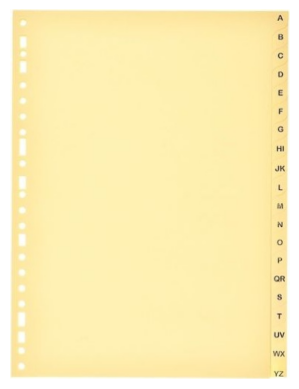

image_971460184_product_262247021.jpg image_971460184_product_262247021.jpg
149.1102383704171
83.96113989637306
4224.0


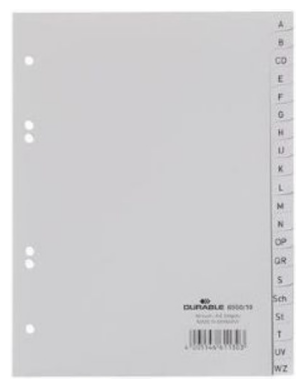

image_1116961494_product_1966973808.jpg image_1116961494_product_1966973808.jpg
108.88629551593571
44.78448637316561
1409.0


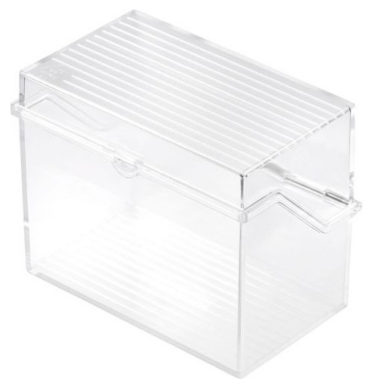

image_1302547891_product_4155424183.jpg image_1302547891_product_4155424183.jpg
104.92356075640532
34.2116
132.0


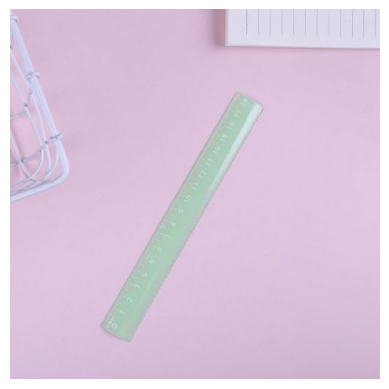

image_1142264227_product_2448615676.jpg image_1142264227_product_2448615676.jpg
123.86518301931572
69.72584269662921
2036.0


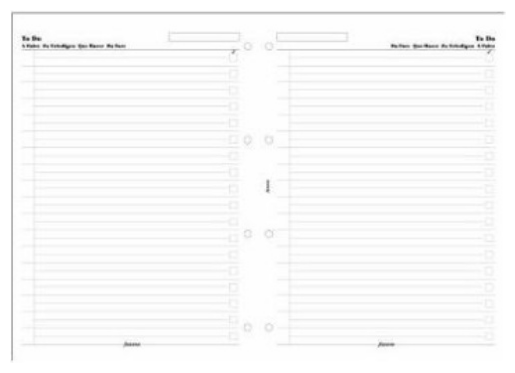

image_1018396218_product_510785964.jpg image_1018396218_product_510785964.jpg
103.21466838957627
40.34955752212389
0.0


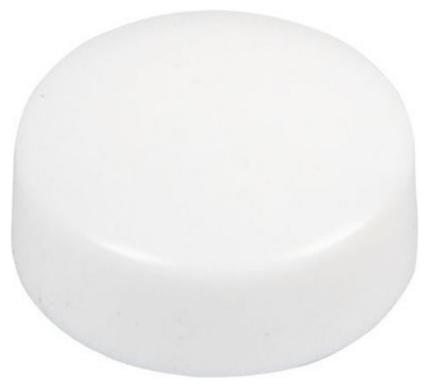

image_1308900557_product_4177867194.jpg image_1308900557_product_4177867194.jpg
122.56395090218524
23.641935483870967
95.0


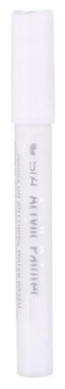

image_1026753564_product_569296654.jpg image_1026753564_product_569296654.jpg
142.84308837118448
35.84049079754601
1622.0


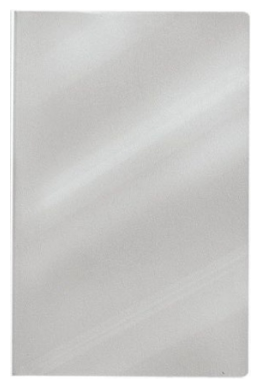

image_1248832388_product_3817888870.jpg image_1248832388_product_3817888870.jpg
117.04649214560004
72.2116
0.0


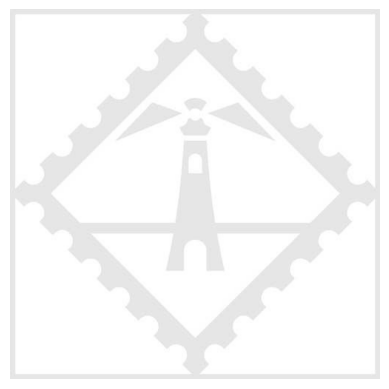

image_1311282268_product_4186852021.jpg image_1311282268_product_4186852021.jpg
132.6941386395504
40.41804539311181
1648.0


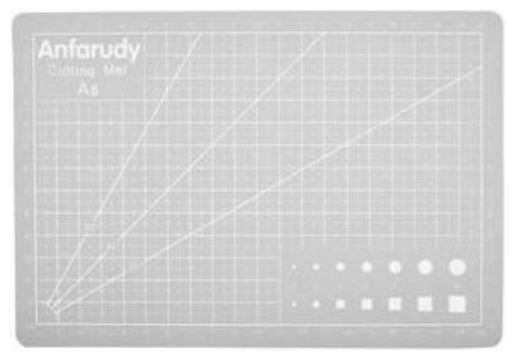

image_1026532649_product_566163499.jpg image_1026532649_product_566163499.jpg
118.61992093932189
57.511585365853655
0.0


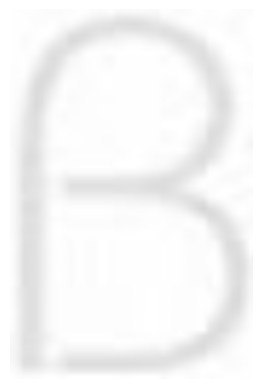

image_1026006174_product_558485894.jpg image_1026006174_product_558485894.jpg
142.68334865311124
45.13775743707094
643.0


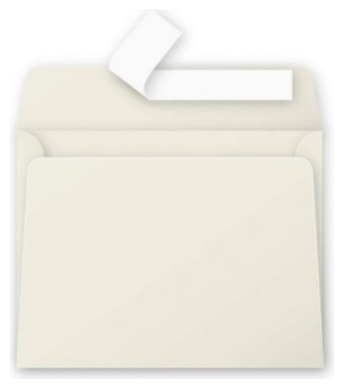

image_1026055385_product_559361546.jpg image_1026055385_product_559361546.jpg
136.33753688797947
32.828936170212764
0.0


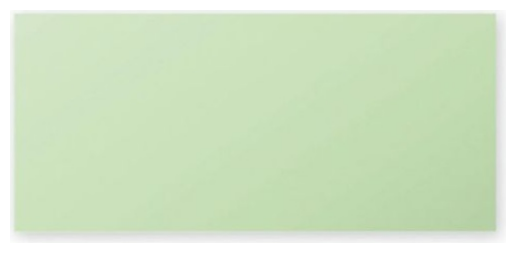

image_992938444_product_300709910.jpg image_992938444_product_300709910.jpg
129.36034161386192
49.7152
1702.0


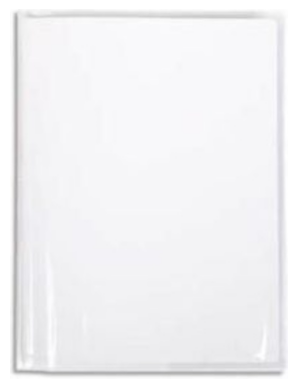

image_1238107009_product_3726159745.jpg image_1238107009_product_3726159745.jpg
122.81495040583332
16.035
0.0


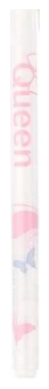

image_1026006039_product_558486631.jpg image_1026006039_product_558486631.jpg
106.98120079677147
35.318438177874185
0.0


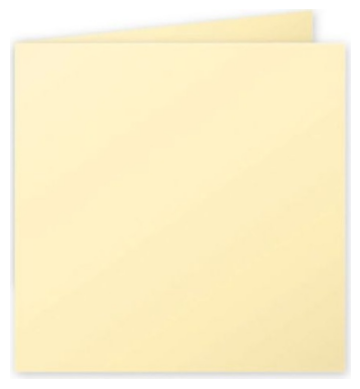

image_1270285325_product_3970496095.jpg image_1270285325_product_3970496095.jpg
114.91339155220076
75.37643504531722
2811.0


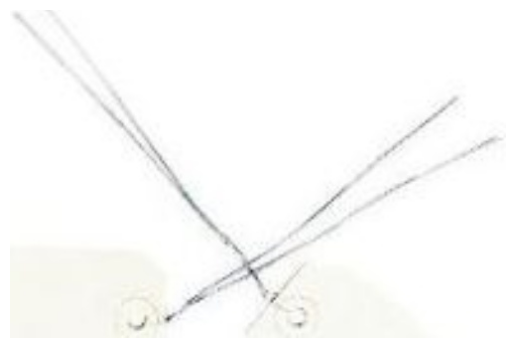

image_1302482090_product_4155417670.jpg image_1302482090_product_4155417670.jpg
147.74347779706576
49.126315789473686
1810.0


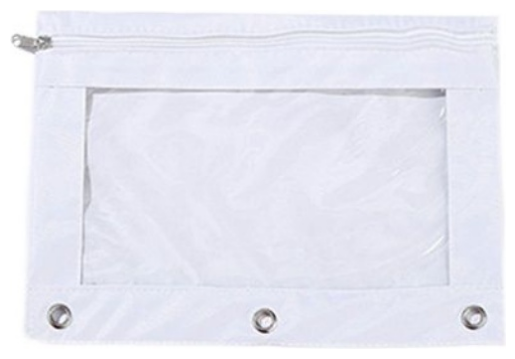

image_1302568662_product_4155424928.jpg image_1302568662_product_4155424928.jpg
137.97504048569192
15.948686868686869
835.0


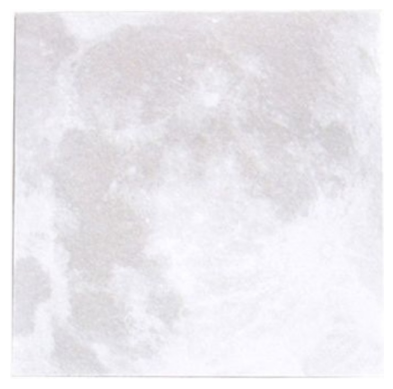

image_971433489_product_262169973.jpg image_971433489_product_262169973.jpg
145.12115072940912
56.85714285714286
0.0


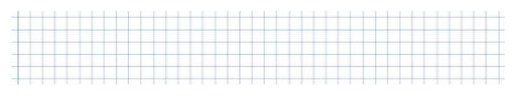

image_1307390069_product_4171236778.jpg image_1307390069_product_4171236778.jpg
148.36792620158403
36.9992
0.0


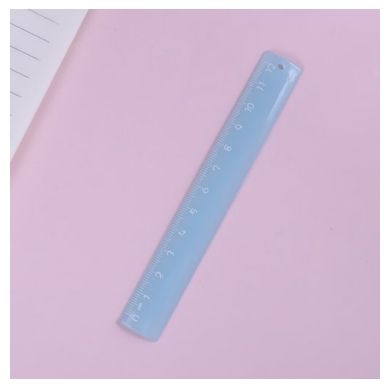

image_1052880566_product_1004196990.jpg image_1052880566_product_1004196990.jpg
120.06392806662296
38.011173184357546
694.0


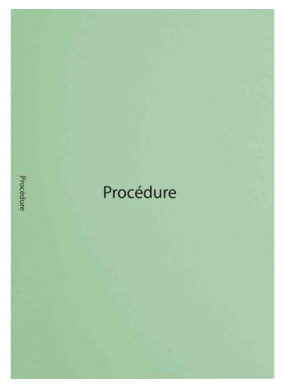

image_1168125624_product_2852954665.jpg image_1168125624_product_2852954665.jpg
111.0851199800874
39.20760456273764
1250.0


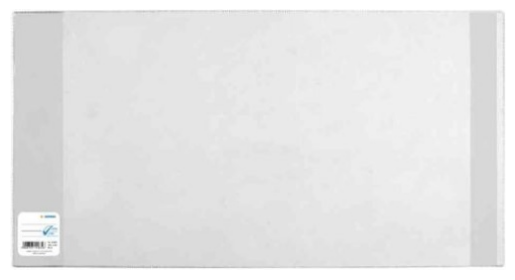

image_1026056424_product_559361615.jpg image_1026056424_product_559361615.jpg
107.63475023674424
37.426016260162605
0.0


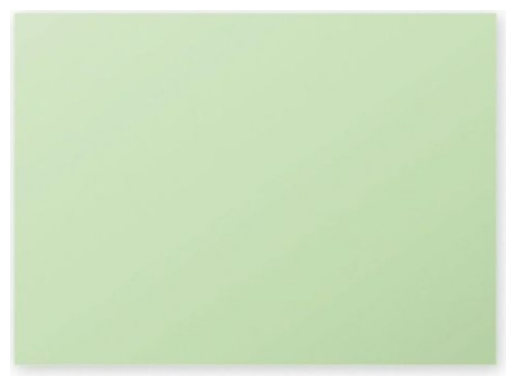

image_1126921655_product_2093627026.jpg image_1126921655_product_2093627026.jpg
114.02452179117826
39.717888563049854
2192.0


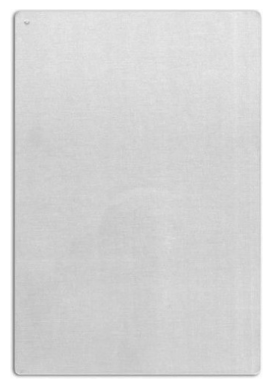

In [79]:
#for filename in train["filename"]: 
for index, row in train.iterrows():
    filename = row["filename"]
    print(filename, row["filename"])
    print(row["mean_var"])
    print(row["dominant_color_ratio"])
    print(row["edge_count"])

    filepath = os.path.join(temp_dir_path, filename)
    image = plt.imread(filepath)  
    plt.imshow(image)
    plt.axis("off")
    plt.show()

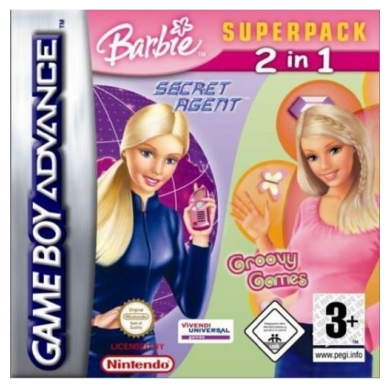

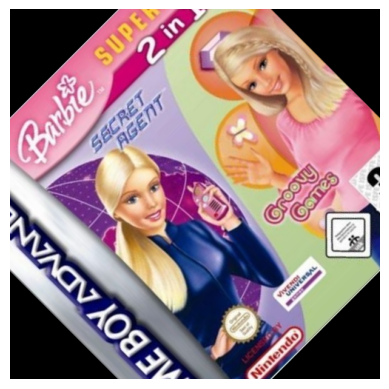

In [20]:
# test de rotation d'image 

def rotation(img, angle):  
    long, large = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(long/2), int(large/2)), angle, 1)
    img = cv2.warpAffine(img, M, (long, large))
    
    return img  

#img = "image_244095830_product_6984759.jpg"  # dragon ball
img = "image_296012169_product_15592410.jpg" #jeu barbie

filepath = os.path.join(temp_dir_path, img)

image = plt.imread(filepath)  
plt.imshow(image)
plt.axis("off")
plt.show()

image_rotation = rotation(image,45)
plt.imshow(image_rotation)
plt.axis("off")
plt.show()

In [ ]:
contour noir à faire supprimer 

image_1038853937_product_767597049.jpg
image_1040131460_product_805999052.jpg